In [ ]:
#importing the gdown library to import the excel file
import gdown

#importing pandas to create a dataframe
import pandas as pd

In [ ]:
#Calling gdown and the file id
!gdown 1WS6TpCyEbRWpkHpzvWK_SLShOsS_Gq-1MDPaYHAv-l8

Downloading...
From (original): https://drive.google.com/uc?id=1WS6TpCyEbRWpkHpzvWK_SLShOsS_Gq-1MDPaYHAv-l8
From (redirected): https://docs.google.com/spreadsheets/d/1WS6TpCyEbRWpkHpzvWK_SLShOsS_Gq-1MDPaYHAv-l8/export?format=xlsx
To: /content/Copy of #PUBLISHINGPAIDME.xlsx
267kB [00:00, 6.26MB/s]


In [ ]:
#define a dataframe named 'PublishingPaidMe'
#using pd.read_excel to read in the file imported from previous step
#input parameter is the location of the file after calling gdown

PublishingPaidMe=pd.read_excel('/content/Copy of #PUBLISHINGPAIDME.xlsx')

In [ ]:
#Access the .columns attribute of the hiring DataFrame to get a list of the column names and print the list.
print("Column Names:")
print(PublishingPaidMe.columns.tolist())

# Print data types of each column
print("\nColumn Data Types:")
print(PublishingPaidMe.dtypes)

Column Names:
['Timestamp', 'Book Genre. Please check off sub-genres as well. (REQUIRED!)', 'Payment (in USD, per book) (REQUIRED!)', 'Rights/Distribution', 'Year (sale preferred, otherwise please use publication year)', 'Publisher (Name or Size)', 'Is this your debut?', 'Was this sale agented?', 'What is your race? (OPTIONAL)', ' What was your gender identity at time of sale? (OPTIONAL)', 'What is your sexual orientation? (OPTIONAL)', 'Did you identify as a person with a disability at time of sale? (OPTIONAL)', 'Author Name (OPTIONAL)', 'Book Title (OPTIONAL)', 'Did you use comp titles when selling the book? Please list them here. Explanation of comp titles: https://lareviewofbooks.org/article/comping-white/', 'Additional comments (multiple offers, at-auction, royalties, deals in other media like tv, award-winning author, already-published bestseller, etc)']

Column Data Types:
Timestamp                                                                                                   

In [ ]:
# Define the target genres to include
target_genres_include = ['Science Fiction and Fantasy', 'Literary Fiction']

# Define the genres to exclude
target_genres_exclude = ['Anthology', 'Short Story']

# Create a boolean mask to filter for rows containing either of the target genres to include
genre_mask_include = PublishingPaidMe['Book Genre. Please check off sub-genres as well. (REQUIRED!)'].astype(str).str.contains('|'.join(target_genres_include), case=False, na=False)

# Create a boolean mask to filter for rows containing any of the genres to exclude
genre_mask_exclude = PublishingPaidMe['Book Genre. Please check off sub-genres as well. (REQUIRED!)'].astype(str).str.contains('|'.join(target_genres_exclude), case=False, na=False)

# Filter the DataFrame: include target genres and exclude specified genres
filtered_df = PublishingPaidMe[genre_mask_include & ~genre_mask_exclude].copy()

# Convert 'Year' column to numeric, coercing errors to NaN
filtered_df['Year_Cleaned'] = pd.to_numeric(filtered_df['Year (sale preferred, otherwise please use publication year)'], errors='coerce')

# Drop rows where 'Year_Cleaned' is NaN after conversion
filtered_df.dropna(subset=['Year_Cleaned'], inplace=True)

# Convert 'Year_Cleaned' to integer
filtered_df['Year_Cleaned'] = filtered_df['Year_Cleaned'].astype(int)

# Function to consolidate genres
def consolidate_genre(genre_string):
    if pd.isna(genre_string):
        return genre_string
    genre_string_lower = genre_string.lower()
    if 'science fiction and fantasy' in genre_string_lower:
        return 'Science Fiction and Fantasy'
    elif 'literary fiction' in genre_string_lower:
        return 'Literary Fiction'
    return genre_string # Should not be reached often due to initial filtering

# Apply genre consolidation
filtered_df['Consolidated_Book_Genre'] = filtered_df['Book Genre. Please check off sub-genres as well. (REQUIRED!)'].apply(consolidate_genre)

# Calculate the average payment per year for the filtered and consolidated genres
average_payment_per_year_genre = filtered_df.groupby(['Year_Cleaned', 'Consolidated_Book_Genre'])['Payment (in USD, per book) (REQUIRED!)'].mean().reset_index()

# Calculate the number of book deals per year and consolidated genre
book_deals_count = filtered_df.groupby(['Year_Cleaned', 'Consolidated_Book_Genre']).size().reset_index(name='Number of Book Deals')

# Merge the average payment and book deals count
average_payment_per_year_genre = pd.merge(
    average_payment_per_year_genre,
    book_deals_count,
    on=['Year_Cleaned', 'Consolidated_Book_Genre'],
    how='left'
)

# Rename columns for clarity
average_payment_per_year_genre.rename(columns={
    'Year_Cleaned': 'Year',
    'Consolidated_Book_Genre': 'Book Genre',
    'Payment (in USD, per book) (REQUIRED!)': 'Average Payment'
}, inplace=True)

# Filter for years between 2020 and 2025
average_payment_per_year_genre = average_payment_per_year_genre[
    (average_payment_per_year_genre['Year'] >= 2020) &
    (average_payment_per_year_genre['Year'] <= 2025)
]

# Format 'Average Payment' to two decimal places
average_payment_per_year_genre['Average Payment'] = average_payment_per_year_genre['Average Payment'].round(2)

# Set display option to show all rows and increase display width to prevent column wrapping
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000) # Set a wider display width

print("Average payment per year and number of book deals for consolidated Science Fiction and Fantasy and Literary Fiction genres (excluding Anthology and Short Story, 2020-2025):")
print(average_payment_per_year_genre)

Average payment per year and number of book deals for consolidated Science Fiction and Fantasy and Literary Fiction genres (excluding Anthology and Short Story, 2020-2025):
    Year                   Book Genre  Average Payment  Number of Book Deals
46  2020             Literary Fiction        179463.64                    22
47  2020  Science Fiction and Fantasy         36881.04                    42
48  2021             Literary Fiction        195000.00                     5
49  2021  Science Fiction and Fantasy         34627.27                    11
50  2022             Literary Fiction         15000.00                     1
51  2022  Science Fiction and Fantasy         40000.00                     2
52  2023             Literary Fiction         25000.70                     2
53  2024  Science Fiction and Fantasy         75000.00                     1
54  2025  Science Fiction and Fantasy         20000.00                     1


In [ ]:
# Define the target genres to include
target_genres_include = ['Science Fiction and Fantasy', 'Literary Fiction']

# Define the genres to exclude
target_genres_exclude = ['Anthology', 'Short Story']

# Create a boolean mask to filter for rows containing either of the target genres to include
genre_mask_include = PublishingPaidMe['Book Genre. Please check off sub-genres as well. (REQUIRED!)'].astype(str).str.contains('|'.join(target_genres_include), case=False, na=False)

# Create a boolean mask to filter for rows containing any of the genres to exclude
genre_mask_exclude = PublishingPaidMe['Book Genre. Please check off sub-genres as well. (REQUIRED!)'].astype(str).str.contains('|'.join(target_genres_exclude), case=False, na=False)

# Filter the DataFrame: include target genres and exclude specified genres
filtered_df = PublishingPaidMe[genre_mask_include & ~genre_mask_exclude].copy()

# Convert 'Year' column to numeric, coercing errors to NaN
filtered_df['Year_Cleaned'] = pd.to_numeric(filtered_df['Year (sale preferred, otherwise please use publication year)'], errors='coerce')

# Drop rows where 'Year_Cleaned' is NaN after conversion
filtered_df.dropna(subset=['Year_Cleaned'], inplace=True)

# Convert 'Year_Cleaned' to integer
filtered_df['Year_Cleaned'] = filtered_df['Year_Cleaned'].astype(int)

# Calculate the average payment per year for the filtered genres
average_payment_per_year_genre = filtered_df.groupby(['Year_Cleaned', 'Book Genre. Please check off sub-genres as well. (REQUIRED!)'])['Payment (in USD, per book) (REQUIRED!)'].mean().reset_index()

# Calculate the number of book deals per year and genre
book_deals_count = filtered_df.groupby(['Year_Cleaned', 'Book Genre. Please check off sub-genres as well. (REQUIRED!)']).size().reset_index(name='Number of Book Deals')

# Merge the average payment and book deals count
average_payment_per_year_genre = pd.merge(
    average_payment_per_year_genre,
    book_deals_count,
    on=['Year_Cleaned', 'Book Genre. Please check off sub-genres as well. (REQUIRED!)'],
    how='left'
)

# Rename columns for clarity
average_payment_per_year_genre.rename(columns={
    'Year_Cleaned': 'Year',
    'Book Genre. Please check off sub-genres as well. (REQUIRED!)': 'Book Genre',
    'Payment (in USD, per book) (REQUIRED!)': 'Average Payment',
    'Number of Book Deals': 'Number of Book Deals'
}, inplace=True)

# Filter for years between 2020 and 2025
average_payment_per_year_genre = average_payment_per_year_genre[
    (average_payment_per_year_genre['Year'] >= 2020) &
    (average_payment_per_year_genre['Year'] <= 2025)
]

# Format 'Average Payment' to two decimal places
average_payment_per_year_genre['Average Payment'] = average_payment_per_year_genre['Average Payment'].round(2)

# Set display option to show all rows and increase display width to prevent column wrapping
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000) # Set a wider display width

print("Average payment per year and number of book deals for Science Fiction and Fantasy and Literary Fiction genres (excluding Anthology and Short Story, 2020-2025):")
print(average_payment_per_year_genre)

Average payment per year and number of book deals for Science Fiction and Fantasy and Literary Fiction genres (excluding Anthology and Short Story, 2020-2025):
     Year                                         Book Genre  Average Payment  Number of Book Deals
154  2020                             Adult Literary Fiction         69800.00                     4
155  2020                                   Literary Fiction        165178.57                    14
156  2020                          Literary Fiction, Women's        118833.33                     3
157  2020                    MG, Science Fiction and Fantasy         52250.00                     2
158  2020  Romance, Science Fiction and Fantasy, Graphic ...          1800.00                     1
159  2020  Romance, Science Fiction and Fantasy, Thriller...             1.34                     1
160  2020                        Science Fiction and Fantasy         22054.55                    11
161  2020                 Science Fictio

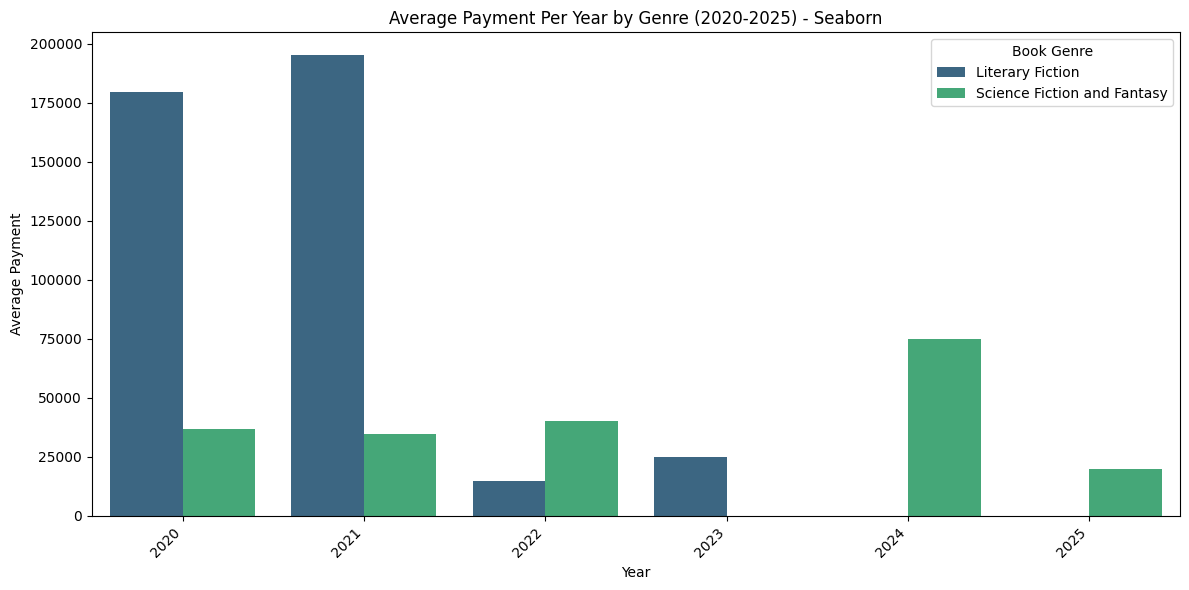

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly Bar Chart
fig_plotly = px.bar(
    average_payment_per_year_genre,
    x='Year',
    y='Average Payment',
    color='Book Genre',
    title='Average Payment Per Year by Genre (2020-2025) - Plotly'
)
fig_plotly.show()

# Seaborn Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=average_payment_per_year_genre,
    x='Year',
    y='Average Payment',
    hue='Book Genre',
    palette='viridis'
)
plt.title('Average Payment Per Year by Genre (2020-2025) - Seaborn')
plt.xlabel('Year')
plt.ylabel('Average Payment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Define the target genres to include
target_genres_include = ['Science Fiction and Fantasy', 'Literary Fiction']

# Define the genres to exclude
target_genres_exclude = ['Anthology', 'Short Story']

# Create a boolean mask to filter for rows containing either of the target genres to include
genre_mask_include = PublishingPaidMe['Book Genre. Please check off sub-genres as well. (REQUIRED!)'].astype(str).str.contains('|'.join(target_genres_include), case=False, na=False)

# Create a boolean mask to filter for rows containing any of the genres to exclude
genre_mask_exclude = PublishingPaidMe['Book Genre. Please check off sub-genres as well. (REQUIRED!)'].astype(str).str.contains('|'.join(target_genres_exclude), case=False, na=False)

# Filter the DataFrame: include target genres and exclude specified genres
filtered_df = PublishingPaidMe[genre_mask_include & ~genre_mask_exclude].copy()

# Convert 'Year' column to numeric, coercing errors to NaN
filtered_df['Year_Cleaned'] = pd.to_numeric(filtered_df['Year (sale preferred, otherwise please use publication year)'], errors='coerce')

# Drop rows where 'Year_Cleaned' is NaN after conversion
filtered_df.dropna(subset=['Year_Cleaned'], inplace=True)

# Convert 'Year_Cleaned' to integer
filtered_df['Year_Cleaned'] = filtered_df['Year_Cleaned'].astype(int)

# Calculate the average payment per year for the filtered genres
average_payment_per_year_genre = filtered_df.groupby(['Year_Cleaned', 'Book Genre. Please check off sub-genres as well. (REQUIRED!)'])['Payment (in USD, per book) (REQUIRED!)'].mean().reset_index()

# Calculate the number of book deals per year and genre
book_deals_count = filtered_df.groupby(['Year_Cleaned', 'Book Genre. Please check off sub-genres as well. (REQUIRED!)']).size().reset_index(name='Number of Book Deals')

# Merge the average payment and book deals count
average_payment_per_year_genre = pd.merge(
    average_payment_per_year_genre,
    book_deals_count,
    on=['Year_Cleaned', 'Book Genre. Please check off sub-genres as well. (REQUIRED!)'],
    how='left'
)

# Rename columns for clarity
average_payment_per_year_genre.rename(columns={
    'Year_Cleaned': 'Year',
    'Book Genre. Please check off sub-genres as well. (REQUIRED!)': 'Book Genre',
    'Payment (in USD, per book) (REQUIRED!)': 'Average Payment',
    'Number of Book Deals': 'Number of Book Deals'
}, inplace=True)

# Filter for years between 2020 and 2025
average_payment_per_year_genre = average_payment_per_year_genre[
    (average_payment_per_year_genre['Year'] >= 2020) &
    (average_payment_per_year_genre['Year'] <= 2025)
]

# Format 'Average Payment' to two decimal places
average_payment_per_year_genre['Average Payment'] = average_payment_per_year_genre['Average Payment'].round(2)

# Set display option to show all rows and increase display width to prevent column wrapping
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000) # Set a wider display width

print("Average payment per year and number of book deals for Science Fiction and Fantasy and Literary Fiction genres (excluding Anthology and Short Story, 2020-2025):")
print(average_payment_per_year_genre)

Average payment per year and number of book deals for Science Fiction and Fantasy and Literary Fiction genres (excluding Anthology and Short Story, 2020-2025):
     Year                                         Book Genre  Average Payment  Number of Book Deals
154  2020                             Adult Literary Fiction         69800.00                     4
155  2020                                   Literary Fiction        165178.57                    14
156  2020                          Literary Fiction, Women's        118833.33                     3
157  2020                    MG, Science Fiction and Fantasy         52250.00                     2
158  2020  Romance, Science Fiction and Fantasy, Graphic ...          1800.00                     1
159  2020  Romance, Science Fiction and Fantasy, Thriller...             1.34                     1
160  2020                        Science Fiction and Fantasy         22054.55                    11
161  2020                 Science Fictio

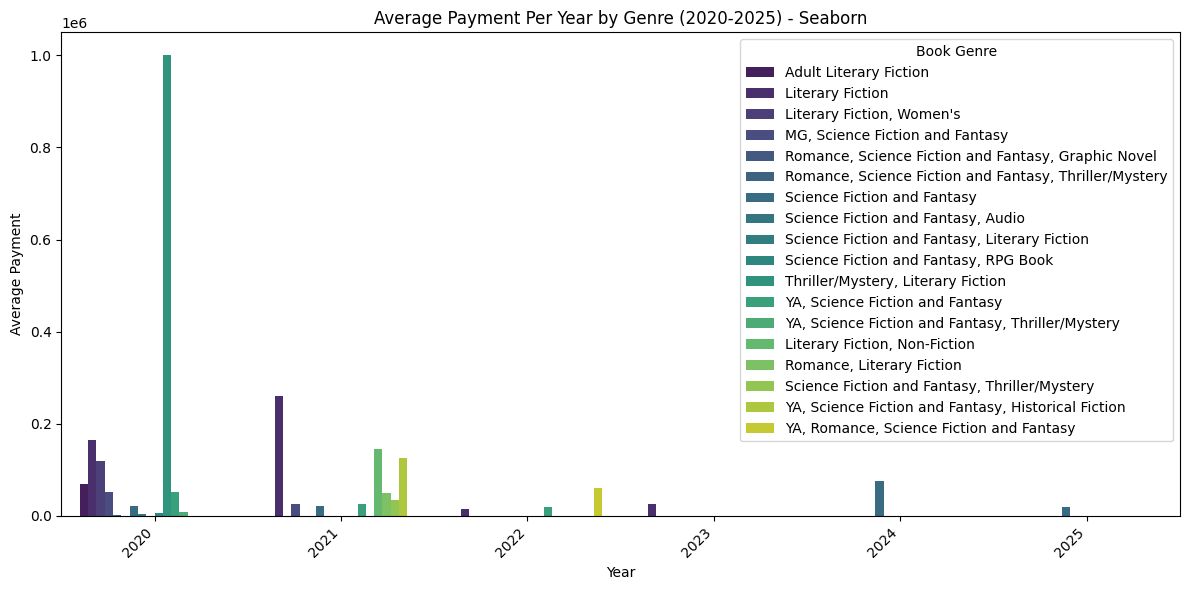

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly Bar Chart
fig_plotly = px.bar(
    average_payment_per_year_genre,
    x='Year',
    y='Average Payment',
    color='Book Genre',
    title='Average Payment Per Year by Genre (2020-2025) - Plotly'
)
fig_plotly.show()

# Seaborn Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=average_payment_per_year_genre,
    x='Year',
    y='Average Payment',
    hue='Book Genre',
    palette='viridis'
)
plt.title('Average Payment Per Year by Genre (2020-2025) - Seaborn')
plt.xlabel('Year')
plt.ylabel('Average Payment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

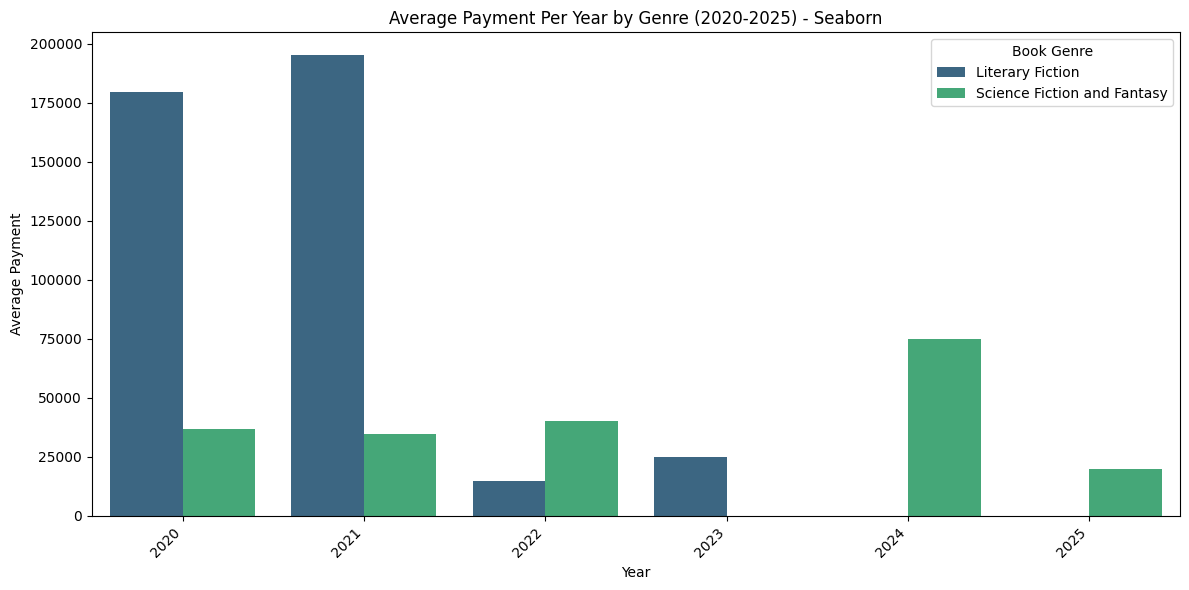

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly Bar Chart
fig_plotly = px.bar(
    average_payment_per_year_genre,
    x='Year',
    y='Average Payment',
    color='Book Genre',
    title='Average Payment Per Year by Genre (2020-2025) - Plotly'
)
fig_plotly.show()

# Seaborn Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=average_payment_per_year_genre,
    x='Year',
    y='Average Payment',
    hue='Book Genre',
    palette='viridis'
)
plt.title('Average Payment Per Year by Genre (2020-2025) - Seaborn')
plt.xlabel('Year')
plt.ylabel('Average Payment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Plotly Box Plot
fig_box = px.box(
    average_payment_per_year_genre,
    x='Book Genre',
    y='Average Payment',
    color='Book Genre',
    title='Distribution of Average Payment Per Year by Genre (2020-2025) - Plotly',
    labels={
        'Book Genre': 'Book Genre',
        'Average Payment': 'Average Payment (USD)'
    }
)
fig_box.show()

In [ ]:
outlier_row = average_payment_per_year_genre[average_payment_per_year_genre['Average Payment'] == 1000000.00]
display(outlier_row)
